# Group 37                   
- Keavatey Srun (s3767615)
- Meng Heng Ea (s3716021) 

# Predicting Credit Risk

## Table of Contents
- [1. Introduction](#intro)
- [2. Methodology](#method)
- [3. Data Cleaning](#cleaning)
- [4. Descriptive Statistics](#descriptive)
- [5. Data Exploration](#exploration)
   - [5.1. Univariate Plots](#uniplot)
   - [5.2. Bivariate Plots](#biplot)
   - [5.3. Three Variables Plots](#triplot)
- [6. Data Preparation](#preparation)
- [7. Feature Selection and Ranking](#featureselection)
 - [7.1. Feature Selection using Random Forest Importance](#featureselection_rf)
 - [7.2. Feature Selection using F-Score](#featureselection_fscore)
 - [7.3. Feature Selection using Mutual Information](#featureselection_mi)
 - [7.4. Performance of Full Set of Features](#featureselection_full)
 - [7.5. Paired TTest](#featureselection_ttest)
- [8. Data Modelling](#modelling)
 - [8.1. k-nearest Neighbours Algorithm](#knn)
 - [8.2. Gaussian Naive Bayes Algorithm](#nb)
 - [8.3. Decision Tree Algorithm](#dt)
 - [8.4. Random Forest Algorithm](#rf)
- [9. Model Comparison](#comparison)
- [10. Discussion and Limitations](#discussion)
- [11. Conclusion](#conclusion)
- [12. Reference](#reference)

## 1. Introduction <a name="intro"></a>

This study aims to find the best algorithm to predict the credit risks of new customers as 'good' or 'bad'. 'Good' means that the customer would pay off the loan as agreed per contract specifications, whereas 'bad' means that the customer would default on the loan. As a result, the main objective of this prediction is to help the bank reduce losses from fraud, ultimately. 

The data is sourced from [Open ML](https://www.openml.org/d/31) (Hofmann, 2014). There are 13 categorical descriptive features and seven numerical descriptive features, and one target feature with two classes defined as "good" and "bad". The full dataset consists of 1000 observations.

The definitions of each feature are outlined below:

- `checking_status`: status of existing checking account consistenting following levels:
 - '< 0 Deustche Mark'
 - '>= 0 and < 200 Deustche Marks'
 - '>= 200 Deustche Marks'
 - 'no checking account'
- `duration`: number of months to pay off the credit
- `credit_history`: 
 - 'no credits taken/all credits paid back duly'
 - 'all credits at this bank paid back duly'
 - 'existing credits paid back duly till now'
 - 'delay in paying off in the past'
 - 'critical account/other credits existing (not at this bank)'
- `purpose`: 
 - 'new car'
 - 'used car'
 - 'furniture/equipment'
 - 'radio/television'
 - 'domestic appliances'
 - 'repairs'
 - 'education'
- `credit_amount`: loaned amount in Deutsche Marks
- `savings_status`: status of saving account/bonds
 - '< 100 Deutsch Marks'
 - '>= 100 and < 500 Deutsch Marks'
 - '>= 500 and < 1000 Deutsch Marks'
 - 'unknown/no savings account'
- `employment`: present employment since
 - '< 1 year'
 - '>= 1 and < 4 years'
 - '>= 4 and < 7 years'
 - '>= 7 years'
- `installment_commitment`: installment rate in percentage of disposable income
- `personal_status`
 - 'male divorced/separated'
 - 'female divorced/separated/married'
 - 'male single'
 - 'male married/widowed'
 - 'female single'
- `residence_since`: present resident since (in years)
- `property_magnitude`
 - 'real estate'
 - 'life insurance'
 - 'car'
 - 'no known property'
- `Age`: in years
- `other_payment_plans`: other installment plans
 - 'bank'
 - 'stores'
 - 'none'
- `housing`
 - 'rent'
 - 'own'
 - 'for free'
- `existing_credits`: number of existing credits at this bank
- `job`: skill levels in job held.
- `num_dependent`: number of people being liable to provide maintenance for
- `own_telephone`
 - 'yes'
 - 'no'
- `foreign_worker`
 - 'yes'
 - 'no'
- `class`: classification of customers in terms of credit risks
 - 'good'
 - 'bad'

## 2. Methodology <a name="method"></a>

This particular modelling task is a supervised classification problem. Ultimately, one supervised machine learning algorithm will be chosen as the best algorithm to predict the target feature, `class` from the following four algorithms, namely:

- k Nearest Neighbors (KNN)
- Gaussian Naive Bayes (NB)
- Decision Tree (DT)
- Random Forest (RF).

Firstly, the data set is checked against the source data description. It is also cleaned to ensure formatting consistencies such as no quotation mark in the level of categorical features, as well as ensure the correct format of the analytic base table. 

Then, the categorical descriptive features are encoded as numeric through one-hot encoding as well as integer encoding. After that, all columns will be scaled so that all features have a range between 0 and 1.

For the Naïve Bayes algorithm, a further step of transforming descriptive features to follow a normal distribution is taken using power transformation before model fitting. 

The most crucial evaluation metric in this context is the AUC score. This can be interpreted as the percentage of the time by which the algorithm will help the bank make correction decisions when presented with two customers, one good and one bad. Furthermore, since the target class level, ‘good’ in this dataset dominates the other class level, ‘bad’, AUC score is chosen because of its robustness to the class imbalance in target feature. 

Three different methods of feature selections, i.e. Random Forest Importance, F-score, Mutual Information are used to select 15 best features. A full set of features will also be fitted. Its performance and three feature selection methods’ performances in terms of accuracy score are compared to select the best method to be fed into the modelling pipeline. 

The 70% training set will be fit for each algorithm for hyperparameter tuning. This is to find the best parameters that optimize the evaluation metric specified earlier, the AUC score. In addition to tuning parameters of each algorithm, the best feature selection method from the preceding step will also be used inside the pipeline to select the best number of features. 

This step involves splitting the 70% training set further into another training set and validation set where the training set is used to tune the parameter and validated against the validation set. It is done at five splits, repeated three times, resulting in a total of 15 fittings. The numerous splits and repetitions are to ensure the accuracy of the validated model and avoid overfitting as well as underfitting. 

10-fold cross-validation is finally used to fit the original dataset. The training set is fitted to the validated model from hyperparameter tuning and then validated against the test set. Similarly, this is to ensure the accuracy of the score and avoid overfitting and underfitting. 

The resulting confusion matrix of each algorithm will need to be multiplied by the cost matrix provided by the data source. These matrices are produced below:

In [1]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Cost Matrix</b>'))

|      ||        ||Predicted ||        |
|------||--------||----------||--------|
|      ||        ||Good      ||Bad     |
|Target||Good    ||0         ||1       |
|      ||Bad     ||5         ||0       |

The cost matrix reflects the different outcomes when evaluating models and can be interpreted as followings:

- TP = 0: when a good customer is classified as having good credit resulting in the bank giving the loan to the customer, the bank does not lose any money because the customer would eventually pay out the loan. 
- TN = 0: when a bad customer is classified as having bad credit resulting in the bank denying the loan to the customer, the bank does not lose the loan on which the customer would have defaulted. 
- FN = 1: when a good customer is classified as having bad credit resulting in the bank declining loan, the bank will lose 1 unit, presumably interest rates.
- FP = 5: when a bad customer is classified as having good credit resulting in the bank giving the loan to the customer, the bank lose the money on which the customer would eventually default. It is worth noting that this is five times worse relative to FN = 1.

##  3. Data Cleaning <a name="cleaning"></a>

Import necessary packages for the data preparation and visualisation tasks.

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# this is to suppress warnings output by Python
import warnings
warnings.filterwarnings('ignore')

# import the pyplot module from the the matplotlib package
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# import seaborn and altair for visualisation
import seaborn as sns
sns.set()

import altair as alt
alt.renderers.enable('html')

# Set a seed value
seed_value = 999 
# 1. Set `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set Python pseudo-random generator
import random
random.seed(seed_value)
# 3. Set Numpy pseudo-random generator
np.random.seed(seed_value)

Data is loaded from github and set as a pandas dataframe.

In [3]:
url = 'https://raw.githubusercontent.com/mengea2019/credit_risk_project/master/dataset_31_credit-g.csv'
credit = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [4]:
# output the tuple where first element is the number of observation and second element is number of columns.
print(credit.shape)

(1000, 21)


The full dataset has 1000 observations. There are 20 descriptive features and feature `class` as target feature. The top and last five observations are also printed to check against the source file to make sure that the data was imported as expected.

In [5]:
credit.head()

checking_status  duration                    credit_history  \
0            '<0'         6  'critical/other existing credit'   
1      '0<=X<200'        48                   'existing paid'   
2   'no checking'        12  'critical/other existing credit'   
3            '<0'        42                   'existing paid'   
4            '<0'        24              'delayed previously'   

               purpose  credit_amount      savings_status employment  \
0             radio/tv           1169  'no known savings'      '>=7'   
1             radio/tv           5951              '<100'   '1<=X<4'   
2            education           2096              '<100'   '4<=X<7'   
3  furniture/equipment           7882              '<100'   '4<=X<7'   
4            'new car'           4870              '<100'   '1<=X<4'   

   installment_commitment       personal_status other_parties  \
0                       4         'male single'          none   
1                       2  'female div/dep/mar'          none   
2                       2         'male single'          none   
3                       2         'male single'     guarantor   
4                       3         'male single'          none   

   residence_since   property_magnitude  age other_payment_plans     housing  \
0                4        'real estate'   67                none         own   
1                2        'real estate'   22                none         own   
2                3        'real estate'   49                none         own   
3                4     'life insurance'   45                none  'for free'   
4                4  'no known property'   53                none  'for free'   

   existing_credits                   job  num_dependents own_telephone  \
0                 2               skilled               1           yes   
1                 1               skilled               1          none   
2                 1  'unskilled resident'               2          none   
3                 1               skilled               2          none   
4                 2               skilled               2          none   

  foreign_worker class  
0            yes  good  
1            yes   bad  
2            yes  good  
3            yes  good  
4            yes   bad

In [6]:
credit.tail()

checking_status  duration                    credit_history  \
995   'no checking'        12                   'existing paid'   
996            '<0'        30                   'existing paid'   
997   'no checking'        12                   'existing paid'   
998            '<0'        45                   'existing paid'   
999      '0<=X<200'        45  'critical/other existing credit'   

                 purpose  credit_amount savings_status  employment  \
995  furniture/equipment           1736         '<100'    '4<=X<7'   
996           'used car'           3857         '<100'    '1<=X<4'   
997             radio/tv            804         '<100'       '>=7'   
998             radio/tv           1845         '<100'    '1<=X<4'   
999           'used car'           4576   '100<=X<500'  unemployed   

     installment_commitment       personal_status other_parties  \
995                       3  'female div/dep/mar'          none   
996                       4        'male div/sep'          none   
997                       4         'male single'          none   
998                       4         'male single'          none   
999                       3         'male single'          none   

     residence_since   property_magnitude  age other_payment_plans  \
995                4        'real estate'   31                none   
996                4     'life insurance'   40                none   
997                4                  car   38                none   
998                4  'no known property'   23                none   
999                4                  car   27                none   

        housing  existing_credits                          job  \
995         own                 1         'unskilled resident'   
996         own                 1  'high qualif/self emp/mgmt'   
997         own                 1                      skilled   
998  'for free'                 1                      skilled   
999         own                 1                      skilled   

     num_dependents own_telephone foreign_worker class  
995               1          none            yes  good  
996               1           yes            yes  good  
997               1          none            yes  good  
998               1           yes            yes   bad  
999               1          none            yes  good

There is a mix of numerical and categorical descriptive features. The target feature is a categorical feature with two levels. The data types for each column are typed meaningfully according to data description, and there is no need for any coercion. Besides, all columns' names are also specified correctly per data description.

In [7]:
print(credit.dtypes)

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object


In [8]:
print(f"\nNumber of missing values for each feature:")
print(credit.isnull().sum())


Number of missing values for each feature:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


As seen above, there are no missing values in the data.
Since some levels of a few categorical features were imported with quotation marks, these are removed to ensure consistency among all levels as followings.

In [9]:
# get the list of categorical descriptive features
categorical_cols = credit.columns[credit.dtypes==object].tolist()

#loop across all categorical features to remove quotation marks and change all strings to lower case.
for col in categorical_cols:
    print('Before transformation, unique values for ' + col)
    print(credit[col].unique())
    print('\nAfter transformation')
    credit[col] = credit[col].str.strip("'")
    credit[col] = credit[col].str.lower()
    credit[col] = credit[col].str.replace('"',"")
    print(credit[col].unique())
    print('')

Before transformation, unique values for checking_status
["'<0'" "'0<=X<200'" "'no checking'" "'>=200'"]

After transformation
['<0' '0<=x<200' 'no checking' '>=200']

Before transformation, unique values for credit_history
["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]

After transformation
['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

Before transformation, unique values for purpose
['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']

After transformation
['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

Before transformation, unique values for savings_status
["'no known savings'" "'<100'" "'500<=X<1000'" "'>=1000'" "'100<=X<500'"]

After transformation
['no known savings' '<100' '500<=x<10

## 4. Descriptive Statistics <a name="descriptive"></a>

Below are summary statistics of numerical and categorical features.

In [10]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Descriptive Statistics of Numerical Features</b>'))
credit.describe(include='int64').round(3)

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000       1000.000                1000.000         1000.000   
mean     20.903       3271.258                   2.973            2.845   
std      12.059       2822.737                   1.119            1.104   
min       4.000        250.000                   1.000            1.000   
25%      12.000       1365.500                   2.000            2.000   
50%      18.000       2319.500                   3.000            3.000   
75%      24.000       3972.250                   4.000            4.000   
max      72.000      18424.000                   4.000            4.000   

            age  existing_credits  num_dependents  
count  1000.000          1000.000        1000.000  
mean     35.546             1.407           1.155  
std      11.375             0.578           0.362  
min      19.000             1.000           1.000  
25%      27.000             1.000           1.000  
50%      33.000             1.000           1.000  
75%      42.000             2.000           1.000  
max      75.000             4.000           2.000

In [11]:
display(HTML('<b>Table 3: Descriptive Statistics of Categorical Features</b>'))
credit.describe(include='object')

checking_status credit_history   purpose savings_status employment  \
count             1000           1000      1000           1000       1000   
unique               4              5        10              5          5   
top        no checking  existing paid  radio/tv           <100     1<=x<4   
freq               394            530       280            603        339   

       personal_status other_parties property_magnitude other_payment_plans  \
count             1000          1000               1000                1000   
unique               4             3                  4                   3   
top        male single          none                car                none   
freq               548           907                332                 814   

       housing      job own_telephone foreign_worker class  
count     1000     1000          1000           1000  1000  
unique       3        4             2              2     2  
top        own  skilled          none            yes  good  
freq       713      630           596            963   700

According to data description, 'female single' is encoded as one of the levels for `personal_status` feature. There are not any in this dataset. Nevertheless, this is of no concern since this might just be coding planned before data collection, and it turned out that there were no customers with such demographic represented in the data set.

In [12]:
# there are no 'female single' level in the 'personal_status' feature
print(np.any(credit[credit['personal_status'] == 'female single']) )
print(credit['personal_status'].value_counts()) 

False
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64


## 5. Data Exploration <a name="exploration"></a>

### 5.1. Univariate Plots <a name="uniplot"></a>

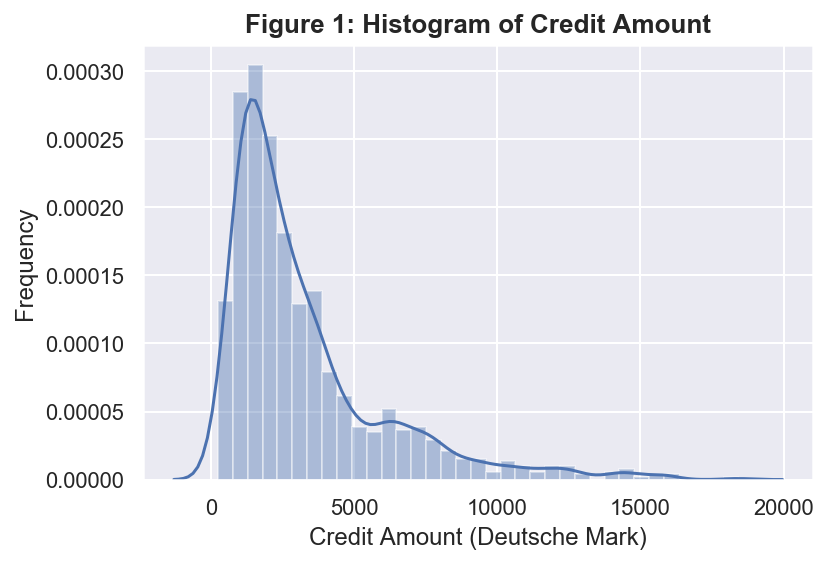

In [13]:
sns.distplot(credit['credit_amount'], kde=True).set_title('Figure 1: Histogram of Credit Amount', fontsize =13, weight='bold')
plt.xlabel('Credit Amount (Deutsche Mark)')
plt.ylabel('Frequency')
plt.show();

According to Figure 1, the histogram of `credit_amount` is right-skewed. It also shows that the most common credit amount is from the minimum value of 250 to 5000 Deutsche Marks.

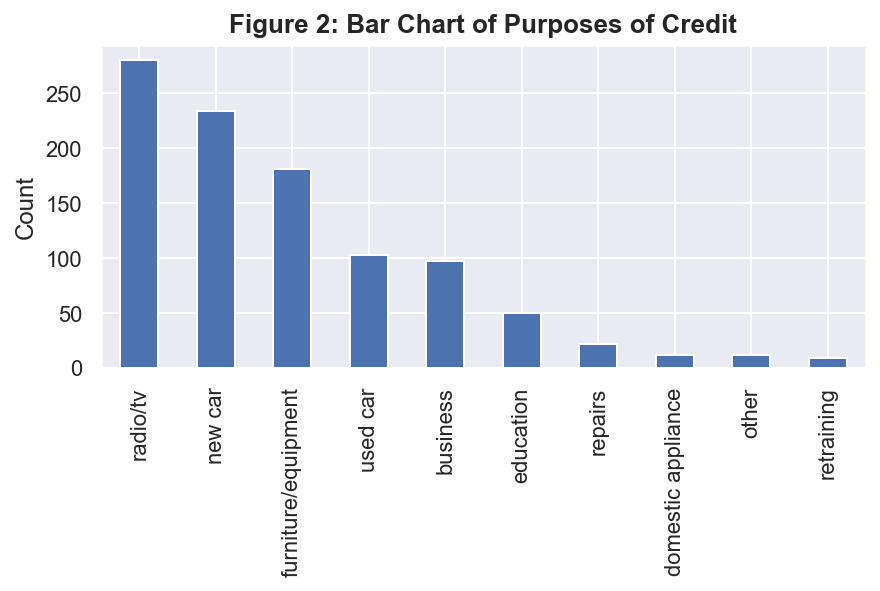

In [14]:
ax = credit['purpose'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 2: Bar Chart of Purposes of Credit', fontsize=13, weight='bold')
plt.ylabel('Count')
plt.show()

From Figure 2, the most three common purposes of people getting the credit are to buy radio/tv, new car and furniture/equipments. This corresponds with average credit amount displayed in Figure 1.

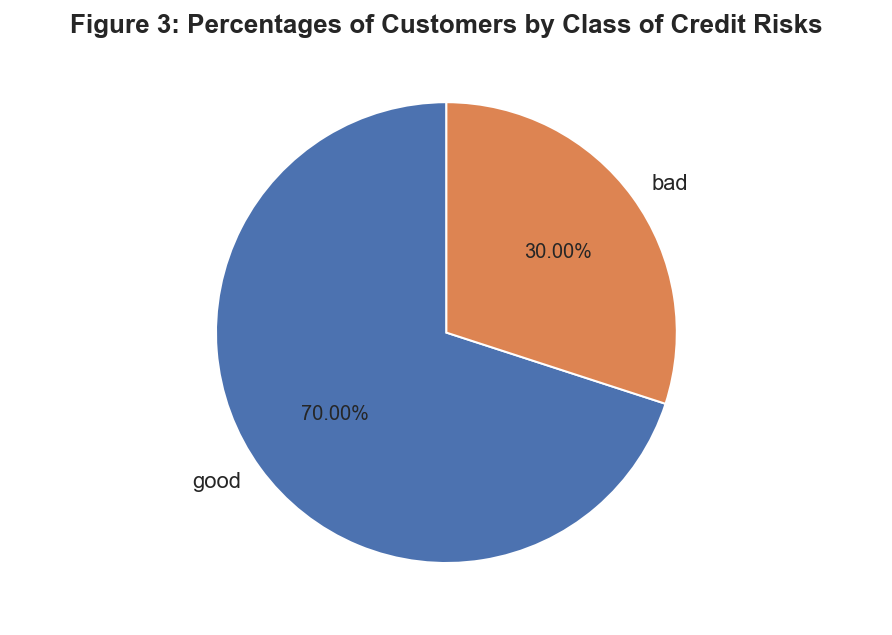

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['good', 'bad']
ax.pie(credit['class'].value_counts(),labels = label, autopct='%1.2f%%',startangle=90)
plt.title('Figure 3: Percentages of Customers by Class of Credit Risks', fontsize=13, weight='bold')
plt.show()

The pie chart in Figure 3 shows that there are 70% good credit risk and 30% bad credit risk in the dataset. It is clear there exists class imbalance in the target feature, `class`.

### 5.2. Bivariate Plots <a name="biplot"></a>

In [16]:
alt.Chart(credit, 
          width=500,
          title='Figure 4: Distribution of Credit Amount by Class of Credit Risks'
         ).mark_bar(opacity=0.90).encode(
    alt.X('credit_amount', bin=alt.Bin(maxbins=150), title = 'Credit Amount (Deutsche Mark)'),
    alt.Y('count()'),
    color = 'class'
)

alt.Chart(...)

The distribution of `credit_amount` by credit risk in Figure 4 shows that the distributions of both classes almost overlapped each other. That infers mean, and median of credit amount in both classes are the same, so credit risk cannot be identified by looking at `credit_amount` alone.

In [17]:
credit['savings_status'].value_counts()

<100                603
no known savings    183
100<=x<500          103
500<=x<1000          63
>=1000               48
Name: savings_status, dtype: int64

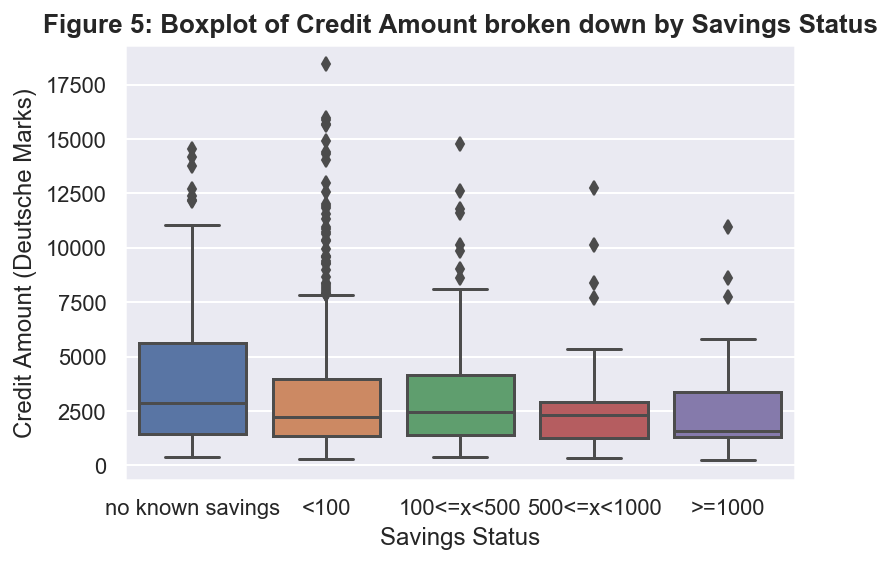

In [18]:
Labels = ['no known savings', '<100', '100<=x<500', '500<=x<1000', '>=1000' ]
credit['savings_status'] = pd.Categorical(credit['savings_status'], Labels)
sns.boxplot(credit['savings_status'], credit['credit_amount'])
plt.title('Figure 5: Boxplot of Credit Amount broken down by Savings Status', fontsize = 13, weight = 'bold')
plt.ylabel('Credit Amount (Deutsche Marks)')
plt.xlabel('Savings Status')
plt.show(); 

Figure 5 displays vertical box plots of the credit amount by the status of savings account. It is observed from the figure that the customers who have more than 1000 Deutsche Marks in savings account appear to borrow less amount of money from the bank with a median of less than 2000 Deutsche Marks. In contrast, customers with no known savings borrowed at just slightly less than 3000 Deutsche Marks with many more customers borrowed up to more than 14000 Deutsch Marks. Interestingly, more customers with less than 100 Deutsche Marks in saving appears to borrow the larger amount than those with no known saving but those are classified as outliers in the boxplot above. 

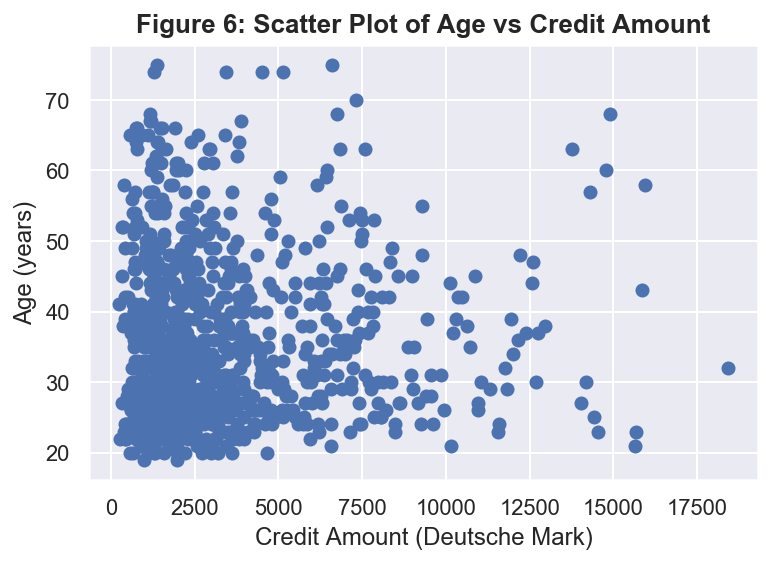

In [19]:
plt.scatter(credit['credit_amount'], credit['age'])
plt.xlabel('Credit Amount (Deutsche Mark)')
plt.ylabel('Age (years)')
plt.title('Figure 6: Scatter Plot of Age vs Credit Amount', fontsize = 13, weight = 'bold')
plt.show()

Figure 6 illustrates a scatter plot of customers' `age`s in years against `credit_amount` in Deutsche Marks. There appears to be no relationship between the two features.

### 5.3. Three Variables Plots <a name="triplot"></a>

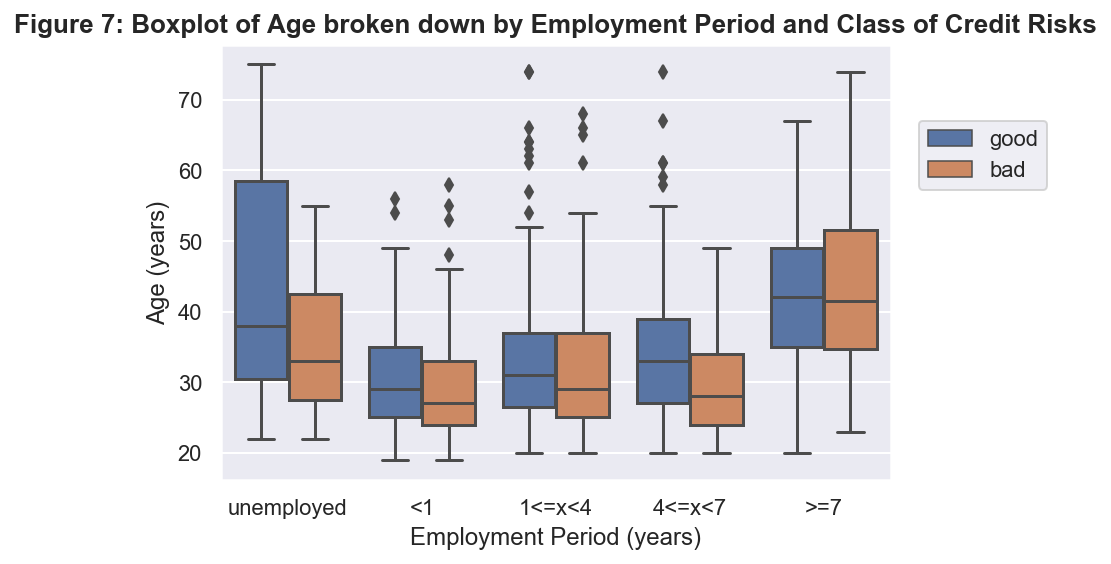

In [20]:
Labels = ['unemployed','<1','1<=x<4','4<=x<7','>=7']
credit['employment'] = pd.Categorical(credit['employment'], Labels)
sns.boxplot(credit['employment'], credit['age'], 
            hue = credit['class'])
plt.legend(loc='left', bbox_to_anchor=(1.25, 0.85), ncol=1)
plt.title('Figure 7: Boxplot of Age broken down by Employment Period and Class of Credit Risks', fontsize = 13, weight = 'bold')
plt.ylabel('Age (years)')
plt.xlabel('Employment Period (years)')
plt.show(); 

Figure 7 illustrates the boxplot of age by employment period and credit risk. From the boxplot, unemployed people who are categorized with good credit risk seem to have a wider range of age, and the average age of those people between good and bad credit risk seems to have a significant difference. However, among people with the employment of less than one year to less than four years and those working more than seven years, the average age between the credit risk class does not seem to be different within each level of the employment period.

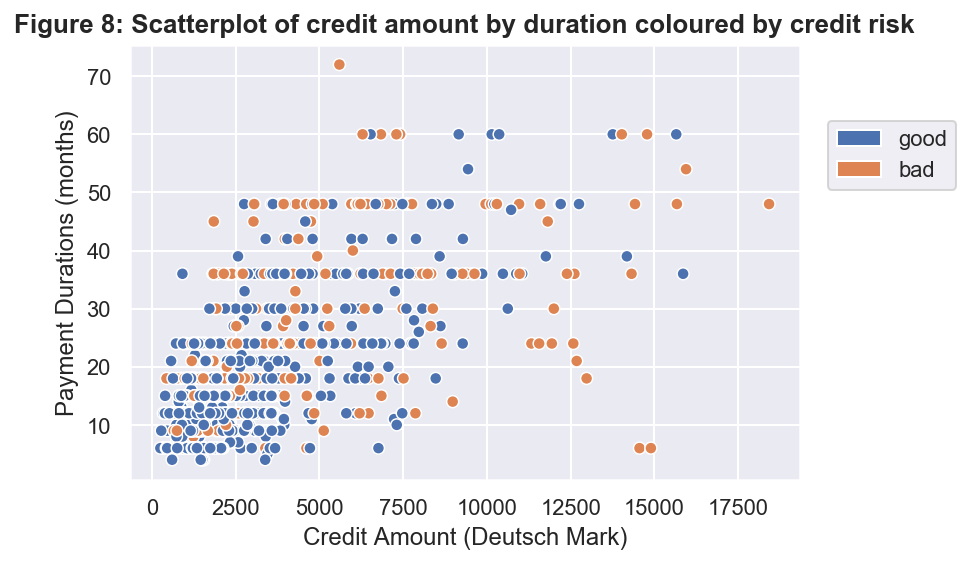

In [21]:
sns.scatterplot(credit['credit_amount'], credit['duration'], hue = credit['class'])
plt.title('Figure 8: Scatterplot of credit amount by duration coloured by credit risk', fontsize = 13, weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.legend(loc='left', bbox_to_anchor=(1.25, 0.85), ncol=1,
           handles=handles, labels=labels)
plt.xlabel('Credit Amount (Deutsch Mark)')
plt.ylabel('Payment Durations (months)')
plt.show();

From Figure 8, the scatter plot indicates there might be a linear relationship between `credit amount` and `duration` in good credit risk yet it is not quite strong one. However, there seems to be no linear relationship between `credit_amount` and `duration` in `bad` credit risk.

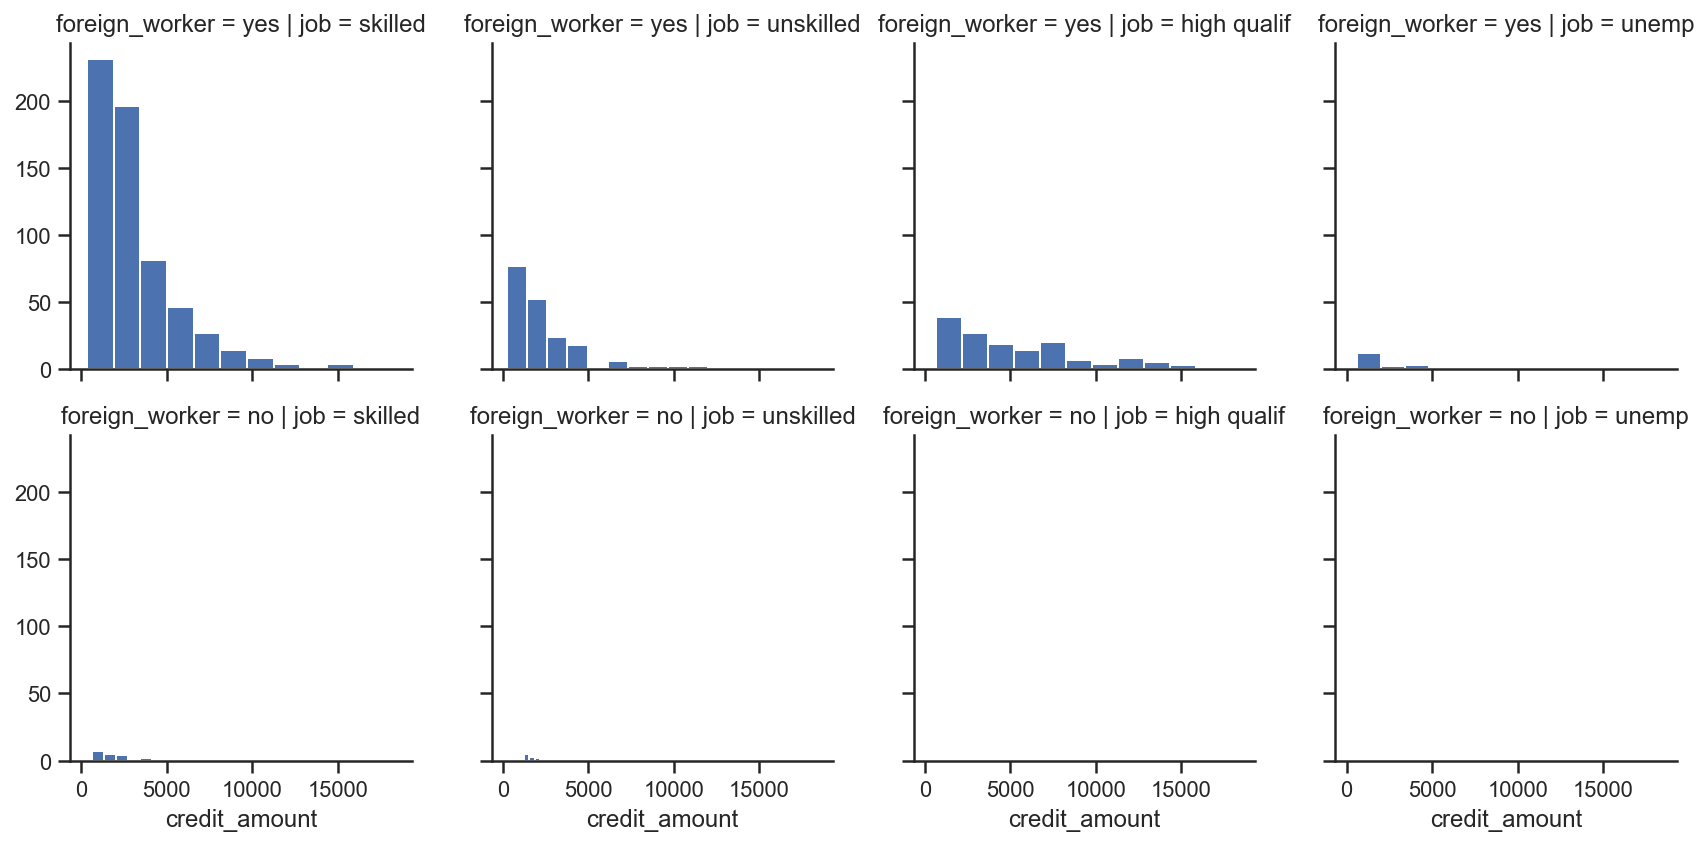

In [22]:
from IPython.display import display, HTML
display(HTML('<b>Figure 9: Histogram of Credit Amount (Deutsche Mark) by Foreign Worker Status and Job Skill Levels</b>'))
credit_3 = credit.copy()
credit_3["job"].replace({"unskilled resident":"unskilled", "high qualif/self emp/mgmt": "high qualif", "unemp/unskilled non res": "unemp"}, inplace = True)
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(credit_3, col="job", row="foreign_worker")
plot = g.map(plt.hist, "credit_amount")

Figure 9 shows the histogram of `credit_amount` facetted by `foreign_worker` status and `job` skill levels. For all combinations of levels, the distributions of `credit_amount` are right-skewed. Further, it is worth noting that most of the customers from this dataset are foreign workers.

## 6. Data Preparation <a name="preparation"></a>

The target feature `class` is positioned as the final feature in the data frame, as suggested by the format of an analytic base table.

In [23]:
credit = credit[[col for col in credit.columns if col not in ['class']] + ['class']] # using list comprehension

Target feature `class` is assigned to a variable named `target`. Then by removing `class` feature from the original data frame, we get the rest of the descriptive features and assign it to variable `Data`. The number of each level or class in the target feature is also printed out. The data set is comprised of 700 good customers and 300 bad customers.  

In [24]:
target = credit['class']

Data = credit.drop(columns = 'class')

target.value_counts()

good    700
bad     300
Name: class, dtype: int64

This step is to label-encode the target feature so that the positive class is "good" and it is encoded as "1". The negative class should be encoded as "bad". Then confirm the correctness of label-encoding by getting a value counts.

In [25]:
target = target.replace({'bad': 0, 'good': 1})
target.value_counts()

1    700
0    300
Name: class, dtype: int64

Display value counts for each one of the ordinal descriptive features, namely `savings_status`, `checking_status`, `employment`.

In [26]:
ordinal_cols = ['savings_status', 'checking_status', 'employment']
for col in ordinal_cols:
    print(credit[col].value_counts())

<100                603
no known savings    183
100<=x<500          103
500<=x<1000          63
>=1000               48
Name: savings_status, dtype: int64
no checking    394
<0             274
0<=x<200       269
>=200           63
Name: checking_status, dtype: int64
1<=x<4        339
>=7           253
4<=x<7        174
<1            172
unemployed     62
Name: employment, dtype: int64


Perform integer encoding for the ordinal variables.

In [27]:
ordinal_cols = ('savings_status', 'checking_status', 'employment')

level_mappings = ({'no known savings': 0, '<100': 1, '100<=x<500': 2, '500<=x<1000': 3, '>=1000': 4}, \
                      {'no checking': 0, '<0': 1, '0<=x<200': 2, '>=200': 3}, \
                      {'unemployed': 0,  '<1': 1, '1<=x<4': 2, '4<=x<7': 3, '>=7': 4})

for (col, level_mapping) in zip(ordinal_cols, level_mappings):
    Data[col] = Data[col].replace(level_mapping)

Data.head()

checking_status  duration                  credit_history  \
0                1         6  critical/other existing credit   
1                2        48                   existing paid   
2                0        12  critical/other existing credit   
3                1        42                   existing paid   
4                1        24              delayed previously   

               purpose  credit_amount  savings_status  employment  \
0             radio/tv           1169               0           4   
1             radio/tv           5951               1           2   
2            education           2096               1           3   
3  furniture/equipment           7882               1           3   
4              new car           4870               1           2   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none                4   
1                       2  female div/dep/mar          none                2   
2                       2         male single          none                3   
3                       2         male single     guarantor                4   
4                       3         male single          none                4   

  property_magnitude  age other_payment_plans   housing  existing_credits  \
0        real estate   67                none       own                 2   
1        real estate   22                none       own                 1   
2        real estate   49                none       own                 1   
3     life insurance   45                none  for free                 1   
4  no known property   53                none  for free                 2   

                  job  num_dependents own_telephone foreign_worker  
0             skilled               1           yes            yes  
1             skilled               1          none            yes  
2  unskilled resident               2          none            yes  
3             skilled               2          none            yes  
4             skilled               2          none            yes

In [28]:
#Display the names of all categorical features
categorical_cols = Data.columns[Data.dtypes == np.object].tolist()
categorical_cols

['credit_history',
 'purpose',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

A new data frame copied from the original data frame `Data` is named as `Data_encoded`. The categorical descriptive features whose number of levels are two is encoded with one binary variable with distinct levels of `0` and `1`. For those that have more than two levels, one-hot-encoding is applied such that the number of binary variables is equal to the number of levels.

In [29]:
Data_encoded = Data.copy() 

for col in categorical_cols:
    q = len(Data_encoded[col].unique())
    if (q == 2):
        Data_encoded[col] = pd.get_dummies(Data_encoded[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# perform regular one-hot-encoding using pd.get_dummies()
Data_encoded = pd.get_dummies(Data_encoded)

Data_encoded.head()

checking_status  duration  credit_amount  savings_status  employment  \
0                1         6           1169               0           4   
1                2        48           5951               1           2   
2                0        12           2096               1           3   
3                1        42           7882               1           3   
4                1        24           4870               1           2   

   installment_commitment  residence_since  age  existing_credits  \
0                       4                4   67                 2   
1                       2                2   22                 1   
2                       2                3   49                 1   
3                       2                4   45                 1   
4                       3                4   53                 2   

   num_dependents  own_telephone  foreign_worker  credit_history_all paid  \
0               1              1               1                        0   
1               1              0               1                        0   
2               2              0               1                        0   
3               2              0               1                        0   
4               2              0               1                        0   

   credit_history_critical/other existing credit  \
0                                              1   
1                                              0   
2                                              1   
3                                              0   
4                                              0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                  0                             0   
1                                  0                             1   
2                                  0                             0   
3                                  0                             1   
4                                  1                             0   

   credit_history_no credits/all paid  purpose_business  \
0                                   0                 0   
1                                   0                 0   
2                                   0                 0   
3                                   0                 0   
4                                   0                 0   

   purpose_domestic appliance  purpose_education  purpose_furniture/equipment  \
0                           0                  0                            0   
1                           0                  0                            0   
2                           0                  1                            0   
3                           0                  0                            1   
4                           0                  0                            0   

   purpose_new car  purpose_other  purpose_radio/tv  purpose_repairs  \
0                0              0                 1                0   
1                0              0                 1                0   
2                0              0                 0                0   
3                0              0                 0                0   
4                1              0                 0                0   

   purpose_retraining  purpose_used car  personal_status_female div/dep/mar  \
0                   0                 0                                   0   
1                   0                 0                                   1   
2                   0                 0                                   0   
3                   0                 0                                   0   
4                   0                 0                                   0   

   personal_status_male div/sep  personal_status_male mar/wid  \
0                             0                             0   
1                             0                             

Now, the data frame is all numerical and ready to be fitted to the `scikit_learn` machine learning algorithm. `MinMaxScaler()` is then used to normalize the ranges of all descriptive features as values between 0 and 1. A new data frame resulting from this is named `Data_encoded_norm_numpy`.

In [30]:
Data_encoded.describe(include='all').round(3)
from sklearn import preprocessing

Data_scaler = preprocessing.MinMaxScaler().fit(Data_encoded)

Data_encoded_norm_numpy = Data_scaler.transform(Data_encoded)

Data_encoded_norm_df = pd.DataFrame(Data_encoded_norm_numpy, 
                                    columns=Data_encoded.columns)

Data_encoded_norm_df.sample(n=4, random_state=999).round(3)

checking_status  duration  credit_amount  savings_status  employment  \
842            0.000     0.206          0.093            0.25        0.25   
68             0.000     0.471          0.086            0.25        0.50   
308            0.667     0.059          0.054            0.25        0.50   
881            0.000     0.294          0.497            0.00        0.50   

     installment_commitment  residence_since    age  existing_credits  \
842                   1.000              1.0  0.071               0.0   
68                    1.000              1.0  0.321               0.0   
308                   0.667              1.0  0.089               0.0   
881                   0.333              1.0  0.518               0.0   

     num_dependents  own_telephone  foreign_worker  credit_history_all paid  \
842             0.0            0.0             1.0                      0.0   
68              0.0            1.0             1.0                      0.0   
308             0.0            0.0             1.0                      0.0   
881             0.0            1.0             1.0                      0.0   

     credit_history_critical/other existing credit  \
842                                            0.0   
68                                             0.0   
308                                            0.0   
881                                            0.0   

     credit_history_delayed previously  credit_history_existing paid  \
842                                0.0                           1.0   
68                                 0.0                           1.0   
308                                0.0                           1.0   
881                                0.0                           1.0   

     credit_history_no credits/all paid  purpose_business  \
842                                 0.0               0.0   
68                                  0.0               0.0   
308                                 0.0               0.0   
881                                 0.0               0.0   

     purpose_domestic appliance  purpose_education  \
842                         0.0                0.0   
68                          0.0                1.0   
308                         0.0                0.0   
881                         0.0                0.0   

     purpose_furniture/equipment  purpose_new car  purpose_other  \
842                          0.0              0.0            0.0   
68                           0.0              0.0            0.0   
308                          1.0              0.0            0.0   
881                          0.0              0.0            0.0   

     purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used car  \
842               0.0              1.0                 0.0               0.0   
68                0.0              0.0                 0.0               0.0   
308               0.0              0.0                 0.0               0.0   
881               0.0              0.0                 0.0               1.0   

     personal_status_female div/dep/mar  personal_status_male div/sep  \
842                                 1.0                           0.0   
68                                  0.0                           0.0   
308                                 1.0                           0.0   
881                                 0.0                           1.0   

     personal_status_male mar/wid  personal_status_male single  \
842                           0.0                          0.0   
68                            0.0                          1.0   
308                           0.0                          0.0   
881                           0.0                          0.0   

     other_parties_co applicant  other_parties_guarantor  other_parties_none  \
842                         0.0                      0.0                 1.0   
68                          0.0                  

In [31]:
print(f'Shape of Data_encoded_norm_df is {Data_encoded_norm_df.shape}\n') 

Data_encoded_norm_df.describe(include='all').round(3)

Shape of Data_encoded_norm_df is (1000, 48)



checking_status  duration  credit_amount  savings_status  employment  \
count         1000.000  1000.000       1000.000        1000.000    1000.000   
mean             0.334     0.249          0.166           0.298       0.596   
std              0.319     0.177          0.155           0.242       0.302   
min              0.000     0.000          0.000           0.000       0.000   
25%              0.000     0.118          0.061           0.250       0.500   
50%              0.333     0.206          0.114           0.250       0.500   
75%              0.667     0.294          0.205           0.250       1.000   
max              1.000     1.000          1.000           1.000       1.000   

       installment_commitment  residence_since       age  existing_credits  \
count                1000.000         1000.000  1000.000          1000.000   
mean                    0.658            0.615     0.295             0.136   
std                     0.373            0.368     0.203             0.193   
min                     0.000            0.000     0.000             0.000   
25%                     0.333            0.333     0.143             0.000   
50%                     0.667            0.667     0.250             0.000   
75%                     1.000            1.000     0.411             0.333   
max                     1.000            1.000     1.000             1.000   

       num_dependents  own_telephone  foreign_worker  credit_history_all paid  \
count        1000.000       1000.000        1000.000                 1000.000   
mean            0.155          0.404           0.963                    0.049   
std             0.362          0.491           0.189                    0.216   
min             0.000          0.000           0.000                    0.000   
25%             0.000          0.000           1.000                    0.000   
50%             0.000          0.000           1.000                    0.000   
75%             0.000          1.000           1.000                    0.000   
max             1.000          1.000           1.000                    1.000   

       credit_history_critical/other existing credit  \
count                                       1000.000   
mean                                           0.293   
std                                            0.455   
min                                            0.000   
25%                                            0.000   
50%                                            0.000   
75%                                            1.000   
max                                            1.000   

       credit_history_delayed previously  credit_history_existing paid  \
count                           1000.000                      1000.000   
mean                               0.088                         0.530   
std                                0.283                         0.499   
min                                0.000                         0.000   
25%                                0.000                         0.000   
50%                                0.000                         1.000   
75%                                0.000                         1.000   
max                                1.000                         1.000   

       credit_history_no credits/all paid  purpose_business  \
count                            1000.000          1000.000   
mean                                0.040             0.097   
std                                 0.196             0.296   
min                                 0.000             0.000   
25%                                 0.000             0.000   
50%                                 0.000             0.000   
75%                                 0.000             0.000   
max                                 1.000             1.000   

       purpose_domestic appliance  purpose_education  \
count                    1000.000           1000.000   
mean      

The minimum value of 0 and the maximum value of 1 of all descriptive features from above output confirm that the range normalization has taken place successfully.

The descriptive features from the preprocessing operations are combined with the target feature to create a new data frame, named `data_clean`. All numerical values are round to the near three decimals.  

In [32]:
df_clean = Data_encoded_norm_df.assign(target = target.values)
df_clean = df_clean.round(3)
df_clean.head()

checking_status  duration  credit_amount  savings_status  employment  \
0            0.333     0.029          0.051            0.00        1.00   
1            0.667     0.647          0.314            0.25        0.50   
2            0.000     0.118          0.102            0.25        0.75   
3            0.333     0.559          0.420            0.25        0.75   
4            0.333     0.294          0.254            0.25        0.50   

   installment_commitment  residence_since    age  existing_credits  \
0                   1.000            1.000  0.857             0.333   
1                   0.333            0.333  0.054             0.000   
2                   0.333            0.667  0.536             0.000   
3                   0.333            1.000  0.464             0.000   
4                   0.667            1.000  0.607             0.333   

   num_dependents  own_telephone  foreign_worker  credit_history_all paid  \
0             0.0            1.0             1.0                      0.0   
1             0.0            0.0             1.0                      0.0   
2             1.0            0.0             1.0                      0.0   
3             1.0            0.0             1.0                      0.0   
4             1.0            0.0             1.0                      0.0   

   credit_history_critical/other existing credit  \
0                                            1.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                0.0                           0.0   
1                                0.0                           1.0   
2                                0.0                           0.0   
3                                0.0                           1.0   
4                                1.0                           0.0   

   credit_history_no credits/all paid  purpose_business  \
0                                 0.0               0.0   
1                                 0.0               0.0   
2                                 0.0               0.0   
3                                 0.0               0.0   
4                                 0.0               0.0   

   purpose_domestic appliance  purpose_education  purpose_furniture/equipment  \
0                         0.0                0.0                          0.0   
1                         0.0                0.0                          0.0   
2                         0.0                1.0                          0.0   
3                         0.0                0.0                          1.0   
4                         0.0                0.0                          0.0   

   purpose_new car  purpose_other  purpose_radio/tv  purpose_repairs  \
0              0.0            0.0               1.0              0.0   
1              0.0            0.0               1.0              0.0   
2              0.0            0.0               0.0              0.0   
3              0.0            0.0               0.0              0.0   
4              1.0            0.0               0.0              0.0   

   purpose_retraining  purpose_used car  personal_status_female div/dep/mar  \
0                 0.0               0.0                                 0.0   
1                 0.0               0.0                                 1.0   
2                 0.0               0.0                                 0.0   
3                 0.0               0.0                                 0.0   
4                 0.0               0.0                                 0.0   

   personal_status_male div/sep  personal_status_male mar/wid  \
0                           0.0                           0.0   
1                           0.0                 

Before fitting to `sk_learn` algorithms, `df_clean` data frame are separated as two NumPy arrays where one is comprised of all descriptive features named `Data` and one is just the target feature named `target`.

In [33]:
target = df_clean.target.values
Data = df_clean.drop(columns = 'target').values

## 7. Feature Selection and Ranking <a name="featureselection"></a>

The purpose of feature selection is to reduce training time and improve the accuracy of the predictive model (Brownlee, 2019).

There are 48 features in total for this dataset. Some features might not relevant or partially relevant to target features. Moreover, those irrelevant or partially relevant features can negatively influence model performances (Shaikh, 2020). Therefore, this section will assess the performance of full set features and perform feature selection using four different methods, including Random Forest Importance, F-score, and Mutual Information.

We will try to select 15 best features by using these four methods and assess their performances. This is followed by paired t-test of each method’s score to score resulting from fitting a full set of feature to see if there is a statistically significant difference between them. 

The performance of all feature selection method below will be assessed by the wrapper `1-nearest neighbour classifier`. Furthermore, we use stratified 5-fold cross-validation with three repetitions with setting the random state to 999 to be able to replicate data later. Also, `Accuracy` will be used as the scoring metrics to compute the cross-validation score of both full set features and feature selection method.

In [34]:
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
scoring_metrics = 'accuracy'
n_features = 15 #selecting 15 best features

Below is the defined function for plotting results of different feature selection methods.

In [35]:
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title= method_name + ' Feature Importance'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

### 7.1 Feature Selection using Random Forest Importance (RFI) <a name="featureselection_rf"></a>

In [36]:
from sklearn.ensemble import RandomForestClassifier

num_features = n_features
model_rfi = RandomForestClassifier(n_estimators = 100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_encoded.columns[fs_indices_rfi].values
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]

Table below is the result of feature selection using RFI.

In [37]:
#concat two dataframes for better visualization 
dfscores = pd.DataFrame(best_features_rfi)
dffeature = pd.DataFrame(feature_importances_rfi)
fscore = pd.concat([dfscores,dffeature],axis=1)
fscore.columns = ['Features','Score']  #naming the dataframe columns
print(fscore.nlargest(15,'Score').round(3))  #print 15 best features

                                         Features  Score
0                                   credit_amount  0.106
1                                 checking_status  0.100
2                                             age  0.087
3                                        duration  0.083
4                                      employment  0.046
5                          installment_commitment  0.042
6                                  savings_status  0.038
7                                 residence_since  0.036
8   credit_history_critical/other existing credit  0.023
9                                existing_credits  0.022
10                                purpose_new car  0.020
11                                  own_telephone  0.017
12                    personal_status_male single  0.017
13                                    housing_own  0.016
14                         property_magnitude_car  0.016


The plot below is used to visualize the result for quicker and better understanding.

In [38]:
from IPython.display import display, HTML
display(HTML('<b>Figure 10: Random Forest Feature Importance</b>'))
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'blue')

alt.Chart(...)

The plot shows the top 15 best features selected by Random Forest Importance. Credit amount is the best one, followed by checking status, age, duration, employment, instalment_commitment, savings_status, residence_since -etc-.

In [39]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metrics)
cv_results_rfi.mean().round(3)

0.656

RFI achieves the mean score of cross-validatin performance of 0.656 meaning the average accuracy of Random Forest Importance is 65.6%.

### 7.2 Feature Selection using F-Score <a name="featureselection_fscore"></a>

In [40]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=n_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
best_features_fscore = Data_encoded.columns[fs_indices_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]

In [41]:
from IPython.display import display, HTML
display(HTML('<b>Figure 11: F-Score Feature Importance</b>'))
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score', 'green')

alt.Chart(...)

The result of 15 best feature selection by F-score shows that duration is the best relevant feature followed by checking status, credit history as critical/other existing credit, credit amount, etc.

In [42]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metrics)
cv_results_fscore.mean().round(3)

0.669

The average accuracy of F-score is 66.9%, which is similary to RFI above.

### 7.3 Feature Selection using Mutual Information <a name="featureselection_mi"></a>

In [43]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=n_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data_encoded.columns[fs_indices_mutual_info].values
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]

In [44]:
from IPython.display import display, HTML
display(HTML('<b>Figure 12: Mutual Information Feature Importance</b>'))
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information', 'purple')

alt.Chart(...)

From the plot, checking status is the most relevant feature chosen by mutual information method. It has the best importance score of 0.76 while other features are less relevant with importance score less than 0.5.

In [45]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metrics)
cv_results_mutual_info.mean().round(3)

0.68

The average accuracy acheived by feature selection using Mutual Information is 68%, which is higher than RFI and F-score.

### 7.4 Performance of Full Set of Features <a name="featureselection_full"></a>

In [46]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metrics)

This is the 15 values returned corresponding to each one of the 3-repetition/5-fold cross-validations.

In [47]:
cv_results_full

array([0.685, 0.645, 0.59 , 0.595, 0.645, 0.6  , 0.585, 0.645, 0.66 ,
       0.67 , 0.65 , 0.635, 0.655, 0.66 , 0.595])

In [48]:
cv_results_full.mean().round(3)

0.634

With all features by 1-nearest neighbor classifier as the wrapper, average cross-valudation performance is 63.4%. 

### 7.5 Paired t-test <a name="featureselection_ttest"></a>

Below is average cross-validation score of full set features and each feature selection method computed above.

In [49]:
print('Full Set of Features:', cv_results_full.mean().round(3))
print('RFI:', cv_results_rfi.mean().round(3))
print('F-Score:', cv_results_fscore.mean().round(3))
print('Mutual Information:', cv_results_mutual_info.mean().round(3))

Full Set of Features: 0.634
RFI: 0.656
F-Score: 0.669
Mutual Information: 0.68


From the result, we could see full set feature has the lowest score while Mutual Information performs better than others.

We used repeated cross-validation to assess this method performance. However, cross-validation is a random process. Therefore, we will do a statistical test to confirm the statistical difference between the score of each feature selection and full set feature. Also, it will be used to determine whether the difference between RFI and F-score is statistically significant. 

Since the random state was fixed to be the same for all-cross-validation, it is assumed that all feature selection methods were fitted and tested on the same data partitions. Thus, paired t-test could be used as a statistical test. The result will be checked against the 5% significance level.


In [50]:
from scipy import stats
print('p-value of RFI vs. full features:',  stats.ttest_rel(cv_results_rfi, cv_results_full).pvalue.round(3))
print('p-value of F-score vs. full features:', stats.ttest_rel(cv_results_fscore, cv_results_full).pvalue.round(3))
print('p-value of Mutual Info vs. full features:', stats.ttest_rel(cv_results_mutual_info, cv_results_full).pvalue.round(3))
print('p-value of Mutual Info vs. RFI:', stats.ttest_rel(cv_results_mutual_info, cv_results_rfi).pvalue.round(3))
print('p-value of Mutual Info vs. F-score:', stats.ttest_rel(cv_results_mutual_info, cv_results_fscore).pvalue.round(3))
print('p-value of RFI vs. F-score:', stats.ttest_rel(cv_results_rfi, cv_results_fscore).pvalue.round(3))

p-value of RFI vs. full features: 0.084
p-value of F-score vs. full features: 0.005
p-value of Mutual Info vs. full features: 0.0
p-value of Mutual Info vs. RFI: 0.033
p-value of Mutual Info vs. F-score: 0.244
p-value of RFI vs. F-score: 0.235


With the result from the paired t-test, all p-values of all pairs are larger than 0.05 except the pairs of F-score vs. full features, Mutual Info vs. full features and Mutual Info vs. RFI. That implies the accuracy score of RFI is not statistically different from the score of full set features, but the accuracy score of F-score is statistically significant from the score of full set features. Moreover, the difference in the performance of RFI is not statistically different from that of F-score.

However, the p-value of Mutual Information compared with full set features is 0.0, which is lower than 0.05. It means the difference of performance of Mutual Information and full set features is statistically significant. While the p-value of Mutal Info compared with F-score is larger than 0.05, which means it is not statistically different. 

Therefore, it can be inferred that we can acheive better performance by selecting best 15 features using Mutual Information or F-score than including all features in the dataset in the traning model.

## 8. Data Modelling <a name="modelling"></a>

There is an uneven proportion of classes where the target feature has 700 "good" and 300 "bad". Thus, `stratify` parameter is set to target to ensure the ratio of 700:300 in both training and testing set. Finally, the `random_state` parameter is set to 999 to be able to replicate the analysis later on.

In [51]:
from sklearn.model_selection import train_test_split

Data_train, Data_test, \
target_train, target_test = train_test_split(Data, target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target)

print(Data_train.shape)
print(Data_test.shape)

(700, 48)
(300, 48)


Next, we will stack feature selection and grid search for hyperparameter tuning via cross-validation in a pipeline for all four algorithms.

Both Mutual Information and F-score methods are included as feature selection methods in the pipeline. RFI is not included as the result in the above section shows its performance is similar to F-score. Full grid search is performed to choose the best hyperparameters for each algorithms.

`AUC` is used as performance metric for all algorithms.

### 8.1. K-Nearest Neighbours Algorithm (KNN) <a name="knn"></a>

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state=999)

For KNN, hyperparameters are follows:
- feature selection method
- number of features (n_features)
- number of neighbors (n_neighbors)
- distance metric (p)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

pipe_KNN = Pipeline([('fselector', SelectKBest()), 
                     ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'fselector__score_func': [f_classif, mutual_info_classif],
                   'fselector__k': [i for i in range(5, 46, 5)] + [Data.shape[1]],
                   'knn__n_neighbors': [1] + [i for i in range(5, 101, 10)],
                   'knn__p': [i for i in range(1, 4, 1)]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN,
                           refit = True,
                           n_jobs=-2,
                           cv=cv_method,
                           scoring='roc_auc',
                           verbose=1) 

In [54]:
gs_pipe_KNN.fit(Data_train, target_train);

Fitting 15 folds for each of 660 candidates, totalling 9900 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-2)]: Done 1694 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-2)]: Done 1944 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 3764 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-2)]: Done 4892 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-2)]: Done 6791 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-2)]: Done 8669 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-2)]: Done 9900 out of 9900 | elapsed:  6.7min finished


In [56]:
gs_pipe_KNN.best_params_

{'fselector__k': 5,
 'fselector__score_func': <function sklearn.feature_selection.mutual_info_.mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'knn__n_neighbors': 25,
 'knn__p': 1}

In [57]:
gs_pipe_KNN.best_score_

0.7169339164237122

In [58]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [59]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head().round(3)

mean_score  std_score max_score min_score fselector__k  \
42    0.716934  0.0464147  0.798591  0.634961            5   
213   0.716383  0.0414224  0.784621  0.622449           20   
210   0.716278  0.0399507   0.78292  0.633868           20   
48    0.713589  0.0560363  0.778912  0.585034            5   
216   0.712836  0.0405244  0.785228  0.621477           20   

                                 fselector__score_func knn__n_neighbors knn__p  
42   <function mutual_info_classif at 0x0000022187A...               25      1  
213         <function f_classif at 0x0000022187243048>               45      1  
210         <function f_classif at 0x0000022187243048>               35      1  
48   <function mutual_info_classif at 0x0000022187A...               45      1  
216         <function f_classif at 0x0000022187243048>               55      1

Based on the result, the optimal KNN model selected 5 features with 25 nearest neighbors and Manhattan distance as distance metric. The best performing KNN returned a mean AUC score of 0.717.

The other combinations are displayed below to show the differences.

In [60]:
print(gs_pipe_KNN.best_estimator_)

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x0000022187A68048>)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=25, p=1,
                                      weights='uniform'))],
         verbose=False)


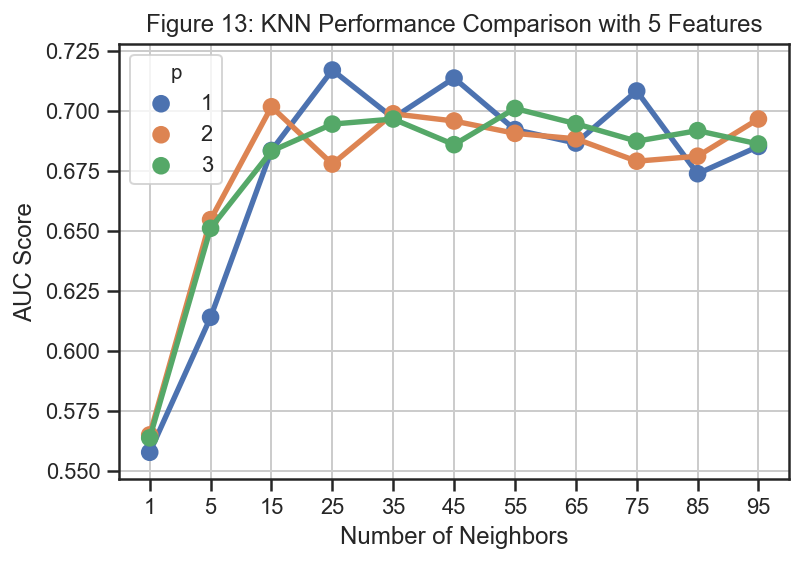

In [61]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN['fselector__score_func'] = results_KNN['fselector__score_func'].astype('|S')
results_KNN_5_features = results_KNN[(results_KNN['fselector__k'] == 5) & (results_KNN['fselector__score_func'] == b'<function mutual_info_classif at 0x0000022187A68048>')]
results_KNN_5_features = results_KNN_5_features.rename(columns = {'knn__p':'p'})
sns.pointplot(x="knn__n_neighbors", y="mean_score", hue="p", data=results_KNN_5_features)
plt.xlabel('Number of Neighbors')
plt.ylabel('AUC Score')
plt.title('Figure 13: KNN Performance Comparison with 5 Features')
plt.grid()
plt.show()

### 8.2. Gaussian Naive Bayes Algorithm (NB) <a name="nb"></a>

Since there is no prior information about the dataset, the aim is to optimize a variant of Laplace smoothing (var_smoothing). Grid search in the log space is used to search for the best parameter value of var_smoothing between 10 and $10^{-9}$ with 200 different values. However, a grid search is performed over only 20 different values to save run times. 

For NB, hyperparameters are follows:
- feature selection method
- number of features (n_features)
- variance smoothing (var_smoothing)

Since Naive Bayes requires each descriptive feature to follow a normal distribution, input data is transformed by using power transformation before model fitting.

In [62]:
from sklearn.preprocessing import PowerTransformer
Data_power = PowerTransformer()

In [63]:
from sklearn.preprocessing import PowerTransformer
Data_scaler_power = Data_power.fit(Data_train)
Data_train_transformed = Data_scaler_power.transform(Data_train)

In [64]:
from sklearn.naive_bayes import GaussianNB


pipe_NB = Pipeline([('fselector', SelectKBest()),
                     ('nb', GaussianNB())])

params_pipe_NB = {'fselector__score_func': [f_classif, mutual_info_classif],
                'fselector__k': [i for i in range(5, 36, 5)] + [Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-9, num=200)}

gs_pipe_NB = GridSearchCV(estimator=pipe_NB, 
                          param_grid = params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_NB.fit(Data_train_transformed, target_train);

Fitting 15 folds for each of 3200 candidates, totalling 48000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 630 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 3739 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-2)]: Done 3989 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 4339 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 4789 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 5339 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 5989 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-2)]: Done 10299 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-2)]: Done 11149 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-2)]: Done 14977 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-2)]: Done 17012 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-2)]: Done 21946 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-2)]: Done 23223 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-2)]: Done 27859 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-2)]: Done 29309 ta

In [65]:
gs_pipe_NB.best_params_

{'fselector__k': 25,
 'fselector__score_func': <function sklearn.feature_selection.univariate_selection.f_classif(X, y)>,
 'nb__var_smoothing': 10.0}

In [66]:
gs_pipe_NB.best_score_

0.7330579850988015

The best performing NB resulted from 25 features selected by F-score with variance smoothing equals to 10 has a mean AUC score of 0.733.

Below is the top 5 rows of values yields by NB. 

In [67]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head().round(3)

mean_score  std_score max_score min_score fselector__k  \
1600   0.733058  0.0345161  0.777697  0.681973           25   
1601   0.732766  0.0341822  0.776239  0.681244           25   
1602   0.732556  0.0343509  0.776239  0.681001           25   
1603   0.732313  0.0343639  0.775024  0.680029           25   
1200   0.732135  0.0362727  0.791302  0.681001           20   

                           fselector__score_func nb__var_smoothing  
1600  <function f_classif at 0x0000022187243048>                10  
1601  <function f_classif at 0x0000022187243048>           8.90735  
1602  <function f_classif at 0x0000022187243048>            7.9341  
1603  <function f_classif at 0x0000022187243048>           7.06718  
1200  <function f_classif at 0x0000022187243048>                10

Below is the plot visualizing the Naive Bayes performance comparison with 15 features.

In [68]:
print(gs_pipe_NB.best_estimator_)

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=25,
                             score_func=<function f_classif at 0x0000022187243048>)),
                ('nb', GaussianNB(priors=None, var_smoothing=10.0))],
         verbose=False)


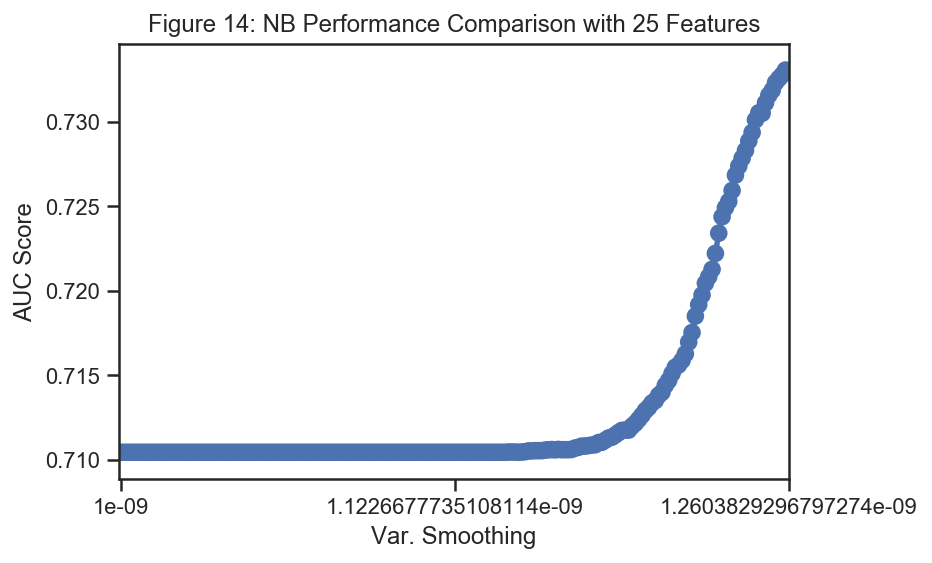

In [69]:
results_NB = get_search_results(gs_pipe_NB)
results_NB['fselector__score_func'] = results_NB['fselector__score_func'].astype('|S')
results_NB_25_features = results_NB[(results_NB['fselector__k'] == 25) & (results_NB['fselector__score_func'] == b'<function f_classif at 0x0000022187243048>')]
ax = sns.pointplot(x="nb__var_smoothing", y="mean_score", data=results_NB_25_features)
plt.xlabel('Var. Smoothing')
plt.ylabel('AUC Score')
plt.title('Figure 14: NB Performance Comparison with 25 Features')
plt.xticks(np.arange(1e-09, 300, 100))
plt.show()

### 8.3. Decision Tree Algorithm<a name="dt"></a>

For decision tree algorithm, hyperparameters are follows:
- feature selection method
- number of features (n_features)
- maximum depth (max_depth)
- minimum sample split (min_samples_split).

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('fselector', SelectKBest()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=999))])

params_pipe_DT = {'fselector__score_func': [f_classif, mutual_info_classif],
                  'fselector__k': [i for i in range(5, 46, 5)] + [Data.shape[1]],
                  'dt__max_depth': [i for i in range(5, 21, 5)],
                  'dt__min_samples_split': [i for i in range(5, 200, 5)]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_train, target_train);

Fitting 15 folds for each of 3120 candidates, totalling 46800 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-2)]: Done 385 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-2)]: Done 885 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-2)]: Done 1585 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-2)]: Done 2485 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 3585 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 4885 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 6385 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 8085 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-2)]: Done 9985 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-2)]: Done 12085 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-2)]: Done 14385 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-2)]: Done 16885 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-2)]: Done 19585 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-2)]: Done 22485 tasks  

In [71]:
gs_pipe_DT.best_params_

{'dt__max_depth': 10,
 'dt__min_samples_split': 90,
 'fselector__k': 20,
 'fselector__score_func': <function sklearn.feature_selection.mutual_info_.mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [72]:
gs_pipe_DT.best_score_

0.7126660187884679

Based on the result, the optimal DT model selected 20 features by using mutual information with 90 minimum sample split and 10 maximum depths. The best performing DT returned a mean AUC score of 0.713.

The other combinations are displayed below to show the differences.

In [73]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head().round(3)

mean_score  std_score max_score min_score dt__max_depth  \
1127   0.712666  0.0323473  0.760933  0.644193            10   
2503   0.710407  0.0359155  0.754495  0.606657            20   
2723   0.709702   0.039419  0.766399  0.608844            20   
1283   0.708511  0.0500076  0.790816  0.636783            10   
2621   0.708487  0.0484601   0.79191  0.612245            20   

     dt__min_samples_split fselector__k  \
1127                    90           20   
2503                    45           10   
2723                   100           10   
1283                   130           10   
2621                    75            5   

                                  fselector__score_func  
1127  <function mutual_info_classif at 0x0000022187A...  
2503  <function mutual_info_classif at 0x0000022187A...  
2723  <function mutual_info_classif at 0x0000022187A...  
1283  <function mutual_info_classif at 0x0000022187A...  
2621  <function mutual_info_classif at 0x0000022187A...

Below is the plot visualizing the Decision Tree algorithm performance comparison with 5 features.

In [74]:
print(gs_pipe_DT.best_estimator_)

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=20,
                             score_func=<function mutual_info_classif at 0x0000022187A68048>)),
                ('dt',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=10, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=90,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=999,
                                        splitter='best'))],
         verbose=False)


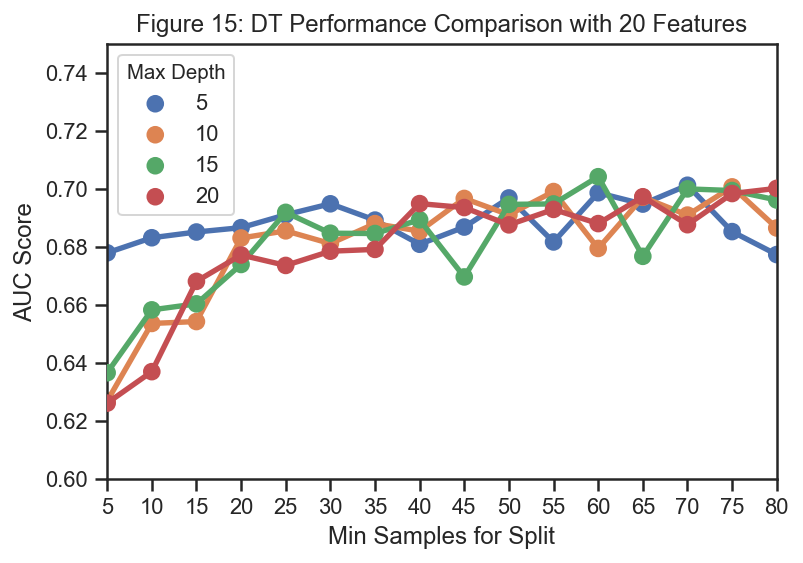

In [75]:
results_DT = get_search_results(gs_pipe_DT)
results_DT['fselector__score_func'] = results_DT['fselector__score_func'].astype('|S')
results_DT_20_features = results_DT[(results_DT['fselector__k'] == 20) & (results_DT['fselector__score_func'] == b'<function mutual_info_classif at 0x0000022187A68048>')]
results_DT_20_features = results_DT_20_features.rename(columns = {'dt__max_depth':'Max Depth'})
sns.pointplot(x="dt__min_samples_split", y="mean_score", hue="Max Depth", data=results_DT_20_features)
plt.xlabel('Min Samples for Split')
plt.ylabel('AUC Score')
plt.title('Figure 15: DT Performance Comparison with 20 Features')
plt.xlim([0, 15])
plt.ylim([0.60, 0.75])
plt.show()

### 8.4. Random Forest Algorithm <a name="rf"></a>

For random forest algorithm, hyperparameters are follows:
- feature selection method
- number of features (n_features)
- maximum depth (max_depth)
- minimum sample split (min_samples_split)
- and number of trees (n_estimators).

In [76]:
from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline([('fselector', SelectKBest()),
                    ('rf', RandomForestClassifier(criterion='gini', random_state=999))])

params_pipe_RF = {'fselector__score_func': [f_classif, mutual_info_classif],
                  'fselector__k': [i for i in range(5, 46, 5)] + [Data.shape[1]],
                  'rf__max_depth': [i for i in range(5, 21, 5)],
                  'rf__min_samples_split': [i for i in range(5, 205, 10)],
                  'rf__n_estimators': [i for i in range(10, 210, 50)]}

gs_pipe_RF = GridSearchCV(estimator=pipe_RF, 
                          param_grid=params_pipe_RF, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_RF.fit(Data_train, target_train);

Fitting 15 folds for each of 6400 candidates, totalling 96000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 276 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-2)]: Done 763 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-2)]: Done 1263 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-2)]: Done 1963 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-2)]: Done 2863 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 3963 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 5055 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-2)]: Done 5805 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-2)]: Done 6655 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-2)]: Done 7605 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-2)]: Done 8655 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-2)]: Done 9928 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-2)]: Done 12428 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-2)]: Done 14790 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-2)]: Done 16240 tasks   

In [77]:
gs_pipe_RF.best_params_

{'fselector__k': 35,
 'fselector__score_func': <function sklearn.feature_selection.univariate_selection.f_classif(X, y)>,
 'rf__max_depth': 15,
 'rf__min_samples_split': 35,
 'rf__n_estimators': 110}

In [78]:
gs_pipe_RF.best_score_

0.781891804340784

Based on the result, the optimal RF model selected 35 features using F-score with 35 minimum sample split, 15 maximum depths and 110 number of trees. The best performing RF returned a mean AUC score of 0.782.

The other combinations are displayed below to show the differences.

In [79]:
results_RF = get_search_results(gs_pipe_RF)
results_RF.head().round(3)

mean_score  std_score max_score min_score fselector__k  \
4014   0.781892  0.0276122  0.820457  0.715986           35   
4578   0.781795  0.0291307  0.824587  0.715986           40   
4095   0.781681  0.0281012  0.818513  0.714286           35   
4015   0.781616  0.0280259  0.817541  0.714286           35   
4094   0.781471  0.0274586  0.820457  0.715986           35   

                           fselector__score_func rf__max_depth  \
4014  <function f_classif at 0x0000022187243048>            15   
4578  <function f_classif at 0x0000022187243048>            10   
4095  <function f_classif at 0x0000022187243048>            20   
4015  <function f_classif at 0x0000022187243048>            15   
4094  <function f_classif at 0x0000022187243048>            20   

     rf__min_samples_split rf__n_estimators  
4014                    35              110  
4578                    45              110  
4095                    35              160  
4015                    35              160  
4094                    35              110

Below is the plot visualizing the Decision Tree algorithm performance comparison with 35 features.

In [80]:
print(gs_pipe_RF.best_estimator_)

Pipeline(memory=None,
         steps=[('fselector',
                 SelectKBest(k=35,
                             score_func=<function f_classif at 0x0000022187243048>)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=35,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=110, n_jobs=None,
                                        oob_score=False, random_state=999,
                                        verbose=0, warm_start=Fal

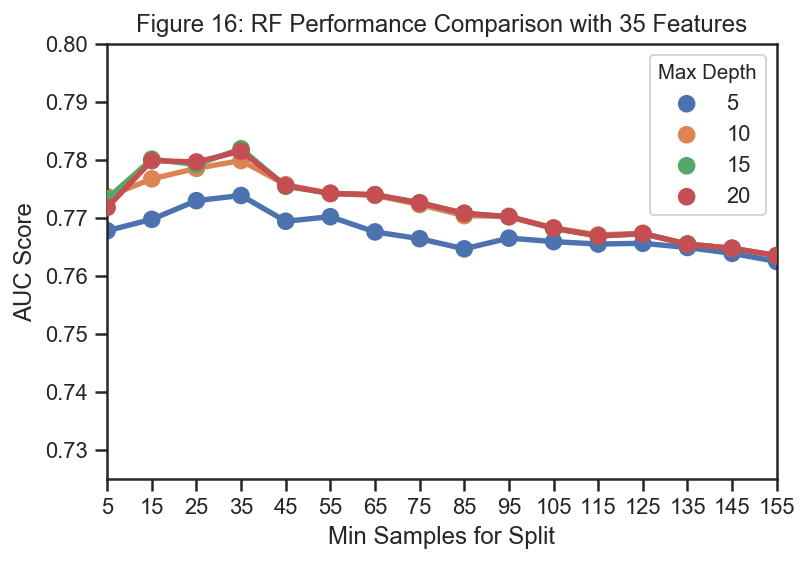

In [81]:
results_RF = get_search_results(gs_pipe_RF)
results_RF['fselector__score_func'] = results_RF['fselector__score_func'].astype('|S')
results_RF_35_features = results_RF[(results_RF['fselector__k'] == 35) \
                                   & (results_RF['fselector__score_func'] == b'<function f_classif at 0x0000022187243048>') \
                                   & (results_RF['rf__n_estimators'] == 110.0)]
results_RF_35_features = results_RF_35_features.rename(columns = {'rf__max_depth':'Max Depth'})
sns.pointplot(x="rf__min_samples_split", y="mean_score", hue="Max Depth", data=results_RF_35_features)
plt.xlabel('Min Samples for Split')
plt.ylabel('AUC Score')
plt.title('Figure 16: RF Performance Comparison with 35 Features')
plt.xlim([0, 15])
plt.ylim([0.725, 0.80])
plt.show()

## 9. Model Comparison <a name="comparison"></a>

### 9.1 AUC scores <a name="AUC"></a>

The best hyperparameters values for each of the classifiers were identified in the hyperparameter tunning above. 

Next we will fit each tuned classifier with the best set of hyperparameter values chosen in the **test data** by using 10-fold stratified cross-validation without repitition to determine which classifier performs the best. 

Followings display AUC scores for all four algorithms after 10-fold cross-validations of 300 rows of test data.

In [82]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

Data_test_transformed = PowerTransformer().fit_transform(Data_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_test_transformed,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=999)

cv_results_RF = cross_val_score(estimator=gs_pipe_RF.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')

print("\nAUC Score for Cross-validated K-Nearest Neighbor") 
print(np.round(cv_results_KNN.mean(),3))
print("\nAUC Score for Cross-validated Naive Bayes") 
print(np.round(cv_results_NB.mean(),3))
print("\nAUC Score for Cross-validated Decision Tree") 
print(np.round(cv_results_DT.mean(),3))
print("\nAUC Score for Cross-validated Random Forest Neighbor") 
print(np.round(cv_results_RF.mean(),3))


AUC Score for Cross-validated K-Nearest Neighbor
0.704

AUC Score for Cross-validated Naive Bayes
0.74

AUC Score for Cross-validated Decision Tree
0.746

AUC Score for Cross-validated Random Forest Neighbor
0.77


The results shows that NB and DT performs similarly while KNN has the lowest performance and RF has the highest performance. 

#### 9.1.1 Paired T-Test of AUC scores <a name="ttest"></a>

Similar to the feature selection above, we used cross-validation for performance assessment of classifiers. 

Cross-validation is a random process whose scores follows a normal distribution. We have also fixed the random state for all four algorithms to fit the same partition of training data and validated against the same partition of test data. Therefore, it is possible to use paired t-test to infer whether their performance are statistically significant difference between each algorithm’s AUC score.

The calculation of the AUC score of each tuned classifier was based on five-fold cross-validation with three repetitions, so it can be assumed that each model was fitted on the same data partitions. Therefore, paired t-test could be used as the statistical test based on the 5% significance level on the pairs below.

- KNN vs. NB
- DT vs. RF
- NB vs. RF
- NB vs. DT
- KNN vs. DT
- KNN vs. RF

In [83]:
from scipy import stats
print('p-value of KNN vs. NB', stats.ttest_rel(cv_results_KNN, cv_results_NB).pvalue.round(3))
print('p-value of DT vs. RF',  stats.ttest_rel(cv_results_DT, cv_results_RF).pvalue.round(3))
print('p-value of NB vs. RF', stats.ttest_rel(cv_results_NB, cv_results_RF).pvalue.round(3))
print('p-value of NB vs. DT', stats.ttest_rel(cv_results_NB, cv_results_DT).pvalue.round(3))
print('p-value of KNN vs. DT', stats.ttest_rel(cv_results_KNN, cv_results_DT).pvalue.round(3))
print('p-value of KNN vs. RF', stats.ttest_rel(cv_results_KNN, cv_results_RF).pvalue.round(3))

p-value of KNN vs. NB 0.451
p-value of DT vs. RF 0.37
p-value of NB vs. RF 0.251
p-value of NB vs. DT 0.887
p-value of KNN vs. DT 0.221
p-value of KNN vs. RF 0.089


The resulted p-values shows that the difference of AUC scores between KNN and RF is statiscally insignificant, albeit with weak evidence. Besides these, although the AUC scores seem to be different for other algorithms, the differences are not statistically significant with strong evidence for the rest of these pairs.

ROC curve of the four algorithms is plotted below

In [84]:
t_prob_knn = gs_pipe_KNN.predict_proba(Data_test)
fpr_knn, tpr_knn, _ = metrics.roc_curve(target_test, t_prob_knn[:, 1])
df_knn = pd.DataFrame({'fpr_knn': fpr_knn, 'tpr_knn': tpr_knn})

t_prob_nb = gs_pipe_NB.predict_proba(Data_test)
fpr_nb, tpr_nb, _ = metrics.roc_curve(target_test, t_prob_nb[:, 1])
df_nb = pd.DataFrame({'fpr_nb': fpr_nb, 'tpr_nb': tpr_nb})

t_prob_dt = gs_pipe_DT.predict_proba(Data_test)
fpr_dt, tpr_dt, _ = metrics.roc_curve(target_test, t_prob_dt[:, 1])
df_dt = pd.DataFrame({'fpr_dt': fpr_dt, 'tpr_dt': tpr_dt})

t_prob_rf = gs_pipe_RF.predict_proba(Data_test)
fpr_rf, tpr_rf, _ = metrics.roc_curve(target_test, t_prob_rf[:, 1])
df_rf = pd.DataFrame({'fpr_rf': fpr_rf, 'tpr_rf': tpr_rf})

df = pd.concat([df_knn, df_nb, df_dt, df_rf], axis = 1)

In [85]:

import altair as alt

base = alt.Chart(df, 
                 title='Figure 17: ROC Curve'
                ).properties(width=300)

roc_curve_knn = base.mark_line(line=True, color = 'red').encode(
    alt.X('fpr_knn', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr_knn', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_curve_nb = base.mark_line(line=True, color = 'green').encode(
    alt.X('fpr_nb', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr_nb', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_curve_dt = base.mark_line(line=True, color = 'purple').encode(
    alt.X('fpr_dt', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr_dt', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_curve_rf = base.mark_line(line=True, color = 'blue').encode(
    alt.X('fpr_rf', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr_rf', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='black').encode(
    x='fpr_knn',
    y='fpr_knn',
    size=alt.value(2)
)

(roc_curve_knn + roc_curve_nb + roc_curve_dt + roc_curve_rf + roc_rule).interactive()

alt.LayerChart(...)

In Figure 17, the red, green, purple and blue curves are ROC curves of `KNN`, `NB`, `DT` and `RF`, respectively.

### 9.2 Classification Report <a name="classification"></a>

Below outputs classification report for all four algorithms.

In [86]:
pred_KNN = gs_pipe_KNN.predict(Data_test)
Data_test_transformed = PowerTransformer().fit_transform(Data_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)
pred_DT = gs_pipe_DT.predict(Data_test)
pred_RF = gs_pipe_RF.predict(Data_test)

from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(target_test, pred_RF))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.54      0.29      0.38        90
           1       0.75      0.90      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.59      0.60       300
weighted avg       0.68      0.71      0.68       300


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.70      1.00      0.82       210

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.58       300


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.48      0.40      0.44        90
           1       0.76      0.81      0.79       210

    accuracy                           0.69       300
  

### 9.3 Cost Matix <a name="cost matrix"></a>

Below displays confusion matrices of all four algorithms.

In [87]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))
print("\nConfusion matrix for Random Forest") 
print(metrics.confusion_matrix(target_test, pred_RF))


Confusion matrix for K-Nearest Neighbor
[[ 26  64]
 [ 22 188]]

Confusion matrix for Naive Bayes
[[  0  90]
 [  0 210]]

Confusion matrix for Decision Tree
[[ 36  54]
 [ 39 171]]

Confusion matrix for Random Forest
[[ 17  73]
 [  8 202]]


Cost matrix from the data source, explained in Methodology section is assigned to a numpy array, named `cost_matrix`.

In [88]:
cost_matrix = np.array([[0, 5], [1, 0]])
cost_matrix

array([[0, 5],
       [1, 0]])

Assuming preceding cost matrix, the following outputs the losses if the bank were to base their decision to predict customers' credit risks according to each of the four algorithms.

In [89]:
confusion_matrix_KNN = metrics.confusion_matrix(target_test, pred_KNN)
overall_cost_matrix_KNN = cost_matrix*confusion_matrix_KNN

confusion_matrix_NB = metrics.confusion_matrix(target_test, pred_NB)
overall_cost_matrix_NB = cost_matrix*confusion_matrix_NB

confusion_matrix_DT = metrics.confusion_matrix(target_test, pred_DT)
overall_cost_matrix_DT = cost_matrix*confusion_matrix_DT

confusion_matrix_RF = metrics.confusion_matrix(target_test, pred_RF)
overall_cost_matrix_RF = cost_matrix*confusion_matrix_RF

print("\nLoss for k-Nearest Neighbor") 
print(np.sum(overall_cost_matrix_KNN))
print("\nLoss for Naive Bayes") 
print(np.sum(overall_cost_matrix_NB))
print("\nLoss for Decision Tree") 
print(np.sum(overall_cost_matrix_DT))
print("\nLoss for Random Forest") 
print(np.sum(overall_cost_matrix_RF))


Loss for k-Nearest Neighbor
342

Loss for Naive Bayes
450

Loss for Decision Tree
309

Loss for Random Forest
373


### 9.4 Prediction Speed <a name="speed"></a>

Using the first three observations as examples of unseen data, followings measure prediction speed of each algorithms.

In [90]:
# use first three rows of original data as an example
obs_for_prediction_unscaled = Data_encoded.iloc[0:3,].values

#transform using MinMaxScaler()
obs_for_prediction = Data_scaler.transform(obs_for_prediction_unscaled)

#before using naive bayes algorith, we need one more step of transformation
#to conver
obs_for_prediction_nb = Data_scaler_power.transform(obs_for_prediction)

knn_classifier_deployment = gs_pipe_KNN.best_estimator_
nb_classifier_deployment = gs_pipe_NB.best_estimator_
dt_classifier_deployment = gs_pipe_DT.best_estimator_
rf_classifier_deployment = gs_pipe_RF.best_estimator_

In [92]:
%%timeit -n 1000
knn_classifier_deployment.predict(obs_for_prediction)

503 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [93]:
%%timeit -n 1000
nb_classifier_deployment.predict(obs_for_prediction_nb)

138 µs ± 4.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [94]:
%%timeit -n 1000
dt_classifier_deployment.predict(obs_for_prediction)

96.7 µs ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [95]:
%%timeit -n 1000
rf_classifier_deployment.predict(obs_for_prediction)

4.77 ms ± 44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 10. Discussion and Limitations <a name="discussion"></a>

In [96]:
display(HTML('<b>Table 4: Algorithms Performance Comparisons</b>'))

In [100]:
data = {'Algorithms': ['KNN', 'NB', 'DT', 'RF'],
        'AUC score of validated model': [gs_pipe_KNN.best_score_, gs_pipe_NB.best_score_, gs_pipe_DT.best_score_, gs_pipe_RF.best_score_],
        'AUC score of final model': [cv_results_KNN.mean(), cv_results_NB.mean(), cv_results_DT.mean(), cv_results_RF.mean()],
       'Cost': [np.sum(overall_cost_matrix_KNN), np.sum(overall_cost_matrix_NB), np.sum(overall_cost_matrix_DT),np.sum(overall_cost_matrix_RF)],
        'Weighted Average Precision Score': [0.68, 0.49, 0.68, 0.72],
       'Training Time': ['6.7 mins', '27.9 mins', '27.8 mins', '90.6 mins'],
       'Prediction Time': ['503 microseconds', '138 microseconds', '96.7 microseconds', '4.77 milliseconds']}
table = pd.DataFrame(data)
table.round(decimals=3)

Algorithms  AUC score of validated model  AUC score of final model  Cost  \
0        KNN                         0.717                     0.704   342   
1         NB                         0.733                     0.740   450   
2         DT                         0.713                     0.746   309   
3         RF                         0.782                     0.770   373   

   Weighted Average Precision Score Training Time     Predition Time  
0                              0.68      6.7 mins   503 microseconds  
1                              0.49     27.9 mins   138 microseconds  
2                              0.68     27.8 mins  96.7 microseconds  
3                              0.72     90.6 mins  4.77 milliseconds

Table 4 summarises model performances across all four algorithms. The AUC scores of `Validated Model` are the scores obtained after hyperparameter tuning on the 70% training set. On the other hand, the AUC scores of `Final Model` are the scores obtained after cross-validation against the unseen 30% test set. The scores between the two columns for each algorithm are not very different, which suggests that 10-fold cross-validations help to resolve overfitting and underfitting of our models. 

Looking at the `Final Model` column alone, it is seen that the **Random Forest** algorithm performs the best out of all algorithms in terms of AUC score, which is 77%. The second-best model is the **Decision Trees**, whose AUC score is 74.6%. Despite being lower, the p-value (0.37 > 0.05) of the paired t-test between the two algorithms concludes there is no statistically significant difference. 

An alternative evaluation metric in this context could be the `Weighted Average of Precision Score`. The rationale behind choosing the precision score over recall score could be justified as followings:

- Precision = TP / (TP + FP) where FP is interpreted as classifier predicting as good customer when it turns out to be bad customer, causing the bank to approve the loan to the customer and consequently losing money when the customer defaults on the loan.
- Recall = TP / (TP + FN) where FN is interpreted as classifier predicting as bad customer when it turns out to be a good customer, causing the bank to fail to approve the loan to the customer and consequently losing the interests.
- As we want to minimize a more severe consequence, FP, while maximizing TP, precision is a more critical metric.
- Besides, the weighted average is calculated to account for class imbalance in the target feature. 

Therefore, based on the `Weighted Average Precision Score` generated from classification reports, **Random Forest** outperforms all others with a weighted average precision score of 72% followed by K-nearest neighbors and Decision Trees tied at 68%.

However, in this particular example, the relative ramifications of each decision path could be quantified and reflected in the cost matrix. As a result, according to the `Cost` column, which are the losses in monetary value if the bank were to base decisions on each algorithm, it suggests that **Decision Tree** algorithm would cause the bank to lose the least amount of money (309 units). Assuming that the cost matrix is updated adequately, **Decision Tree** would be chosen as the best model.   

In terms of faster `Prediction Time` relative to other algorithms, **Decision Tree** also comes first followed by Naive Bayes. Depends on the service time required and how the algorithm is incorporated into software applications or embedded into a website to streamline the business processes, Decision Tree and Naive Bayes would be more favourable relative to the random forest.  

Concerning the need to regularly train algorithm due to change in concept drift, KNN would be the optimal model as it would take only 6.7 minutes compared to 27.8 minutes it took for Decision Tree. Although Decision Tree performs better in terms of AUC score, both algorithm's scores are not statistically different (p-value = 0.221).

It is worth noting that the training time and prediction time discussed here are for comparison purposes between algorithms' performances only. It might be changed depending on the specifications of computation machine. For instance, the higher the specifications of the laptop, the shorter the running time.

All points considered, care should be taken while interpolating results of the algorithm to customers who are not represented in this dataset. For instance, according to Figure 7 shown in the Data Exploration section, combination levels of unemployed foreign workers and foreign workers with high qualifications are not representative in this dataset. The domain space should be explored further to gauge a more comprehensive view of the dataset. 

As the application of machine learning algorithm is getting adopted widely, it is also being scrutinized concurrently, and as a result, various strict policies have been imposed to ensure fairness. For example, relevant to this particular problem, the decision tree might be chosen over the black-boxed random forest as decision tree is more interpretable if transparency is strictly regulated. 

Finally, it might be required by law to assess the credit risks of customers based only on their financial fitness to avoid discriminatory practices. As a result, this could potentially mean that information such as sex, marital status (divorced, widowed) and job (skilled, unskilled) might not be available at times of prediction. The unavailability of these features should thus be taken into considerations during feature selection.  

## 11. Summary and Conclusion <a name="conclusion"></a>

In summary, `Mutual Information` method was observed to achieve the highest accuracy when selecting 15 best features in the dataset. However, during the hyperparameter tunning phase, F-score method with a different number of features was identified to be the best feature selection methods for Naive Bayes and Random Forest. In contrast, the Mutual Information method with was selected as the best feature selection method for the k-nearest Neighbors and  Decision Tree algorithms.

Random Forest with tuned parameters, was identified as the best algorithm in term of AUC score and weighted average precision score. However, it is the third-best after the decision tree and k-nearest neighbors in term of cost. In addition, the Decision tree is the second-best in term of AUC score and training time and has the shortest prediction time.

In conclusion, **Decision Tree** algorithm should be chosen as the best model, because it outperforms other algorithms (**k-nearest Neighbors**, **Naive Bayes** and **Random Forest**) in terms of minimising the bank's loss of money due to customers defaulting on the loan earlier than the period specified in the contracts.

## 12. Reference <a name="reference"></a>

- Aksakalli, V., Yenice, Z., Wong, Y., Ture, I. and Malekipirbazari, M., n.d. Feature Selection And Ranking In Machine Learning | Www.Featureranking.Com. [online] www.featureranking.com. Available at: <https://www.featureranking.com/> [Accessed 29 May 2020].

- Brownlee, J., 2019. How To Choose A Feature Selection Method For Machine Learning. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/> [Accessed 30 May 2020].

- Hofmann, H., 2014. Openml. [online] OpenML: exploring machine learning better, together. Available at: <https://www.openml.org/d/31> [Accessed 18 May 2020].

- Shaikh, R., 2020. Feature Selection Techniques In Machine Learning With Python. [online] Medium. Available at: <https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e> [Accessed 29 May 2020].